## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_excel("dataset.xlsx")

In [5]:
# Check the head of the dataset
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


Inspect the various aspects of the housing dataframe

In [6]:
df.shape

(3309, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [8]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,0.398005
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,0.489561
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000


## Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

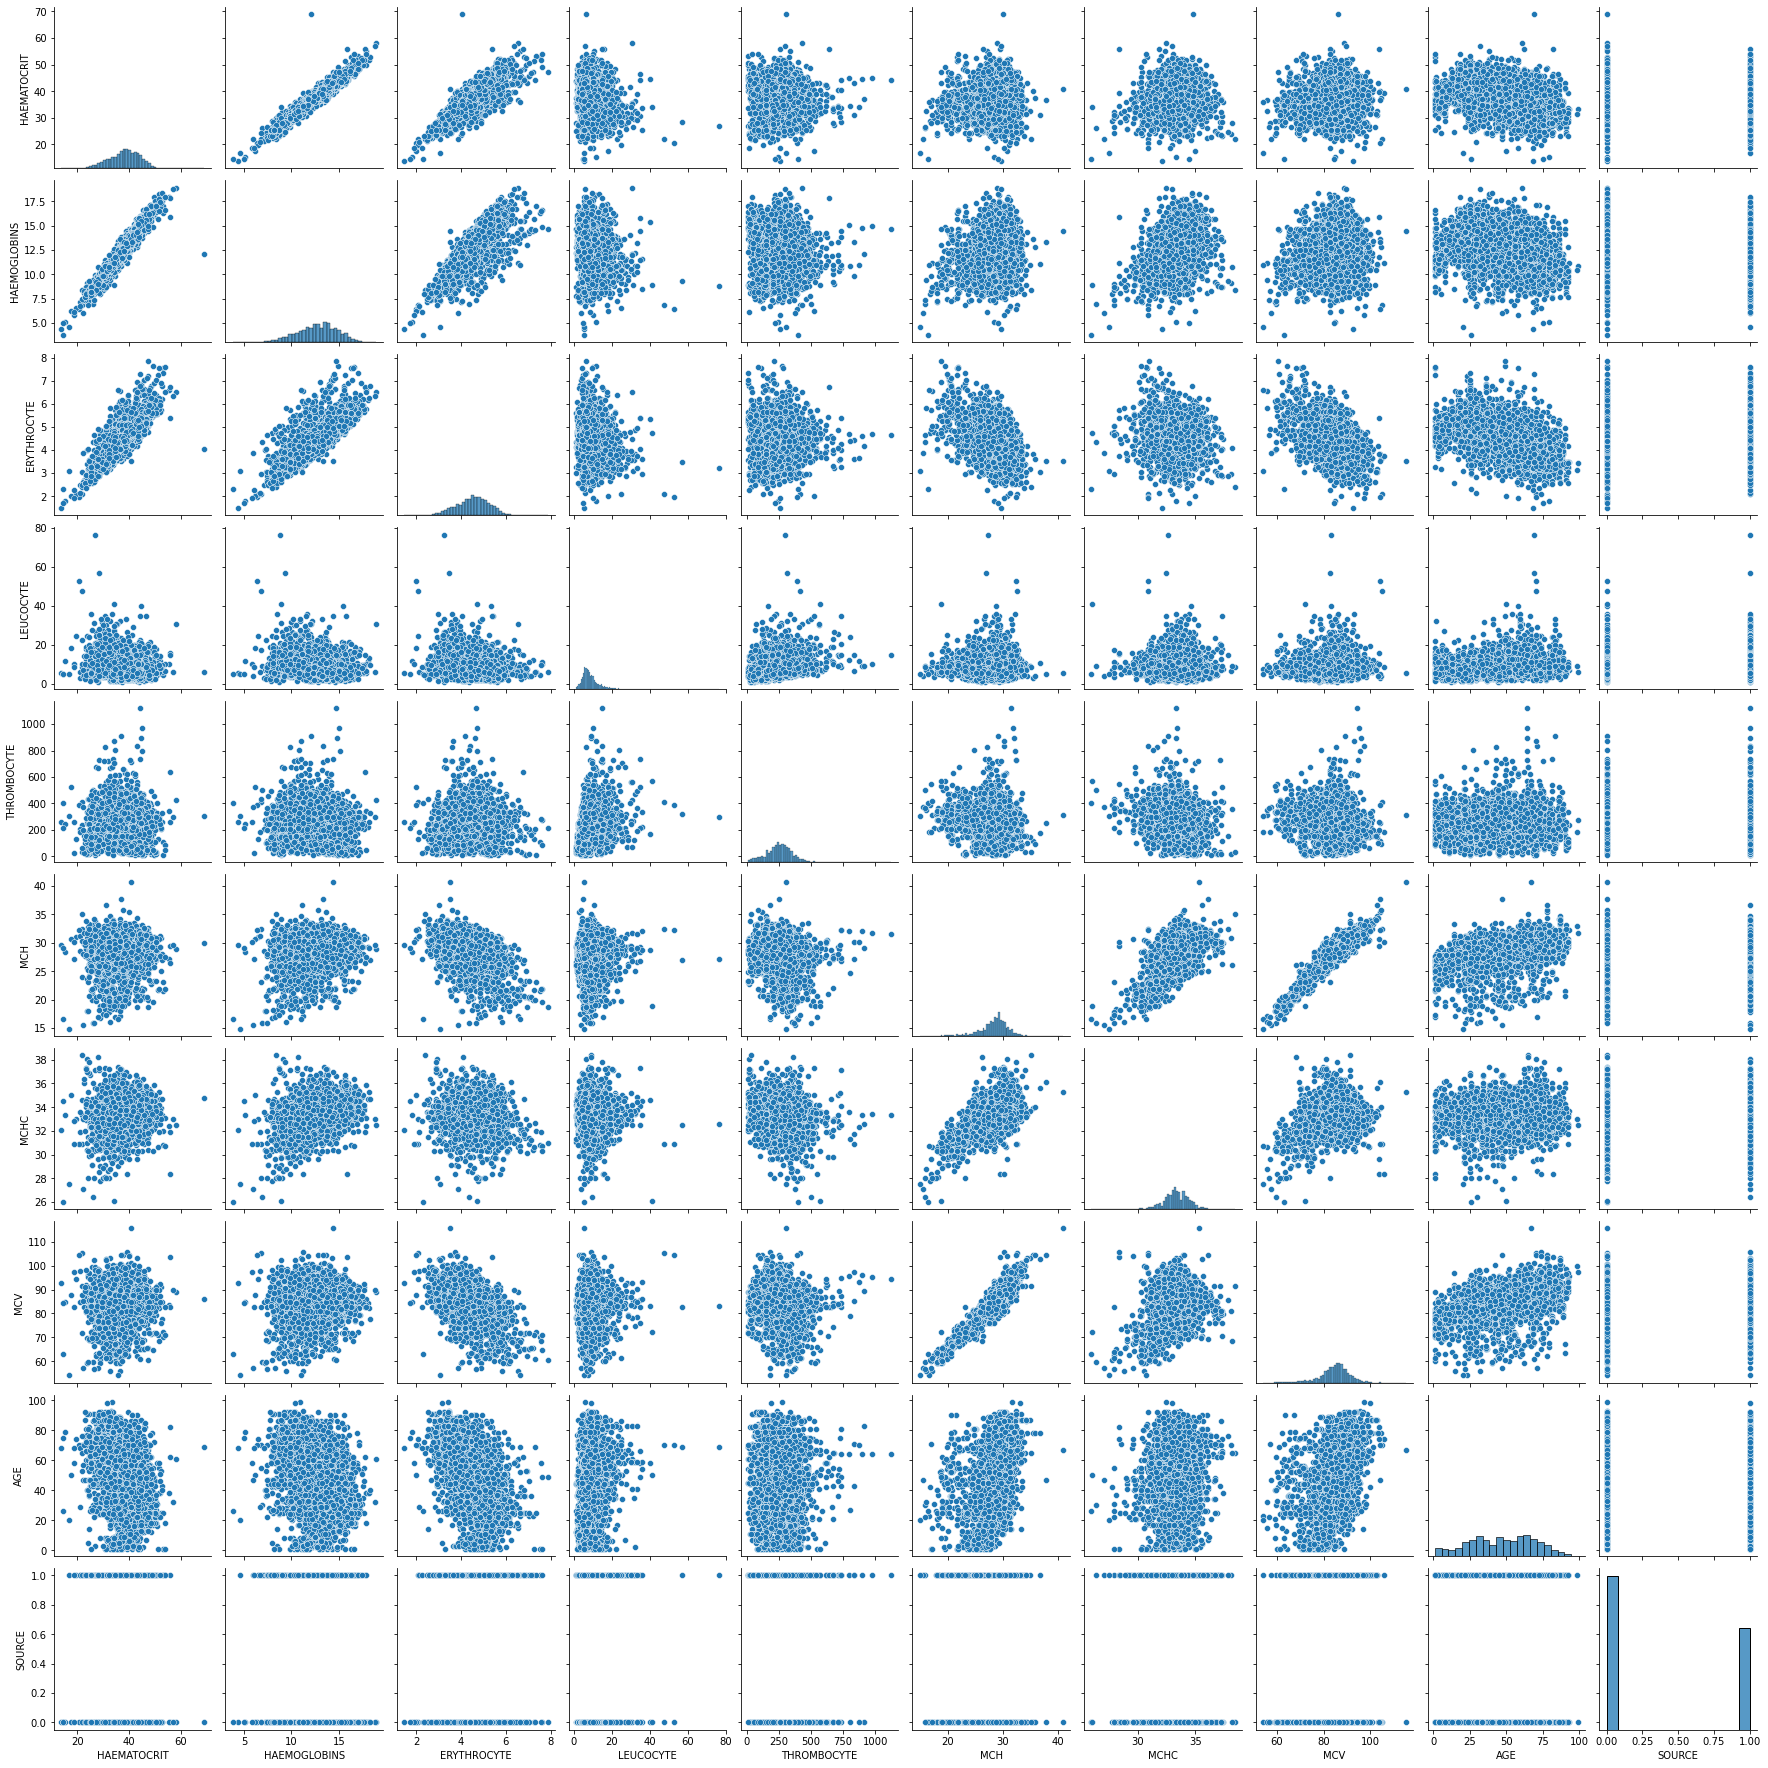

In [10]:
sns.pairplot(df)
plt.show()

### Visualising Categorical Variables
As you might have noticed, there is a  categorical variables as well. Let's make a barplot for some of these variable.


<AxesSubplot:xlabel='SEX', ylabel='SOURCE'>

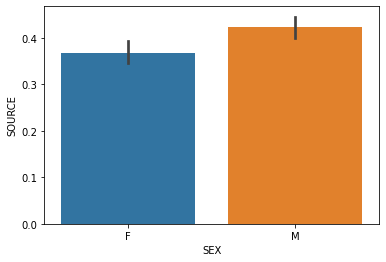

In [12]:

sns.barplot(x = 'SEX', y = 'SOURCE', data = df)

In [18]:
# Defining the map function
def binary_map(x):
    if(x=="M"):
        return 0
    else:
        return 1


In [19]:
# Applying the function to the sex
df["SEX"]= df["SEX"].apply(binary_map)

In [20]:
# convert object to an integer
df['SEX'] = df['SEX'].astype(int)

In [21]:
# Check the dataframe now

df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,1,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,0,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,1,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,1,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,0,0


In [31]:
columns=df.columns

In [32]:
columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

### Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [22]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [27]:
df_train = scaler.fit_transform(df_train)

In [28]:
df_train

array([[0.69266055, 0.68874172, 0.5499154 , ..., 0.80434783, 0.        ,
        0.        ],
       [0.54587156, 0.60927152, 0.42808799, ..., 0.55434783, 1.        ,
        0.        ],
       [0.31651376, 0.35761589, 0.24027073, ..., 0.86956522, 1.        ,
        0.        ],
       ...,
       [0.61926606, 0.67549669, 0.51945854, ..., 0.27173913, 0.        ,
        0.        ],
       [0.74770642, 0.82781457, 0.62944162, ..., 0.20652174, 0.        ,
        0.        ],
       [0.60550459, 0.69536424, 0.49915398, ..., 0.66304348, 0.        ,
        0.        ]])

In [34]:
df_train=pd.DataFrame(data=df_train,columns=columns)

In [35]:
df_train.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,0.692661,0.688742,0.549915,0.082734,0.322614,0.528958,0.467742,0.582792,0.804348,0.0,0.0
1,0.545872,0.609272,0.428088,0.111511,0.304979,0.606178,0.637097,0.586039,0.554348,1.0,0.0
2,0.316514,0.357616,0.240271,0.084532,0.172199,0.555985,0.524194,0.586039,0.869565,1.0,0.0
3,0.584862,0.649007,0.583756,0.086331,0.332988,0.440154,0.645161,0.379870,0.076087,0.0,0.0
4,0.449541,0.523179,0.407783,0.161871,0.262448,0.517375,0.669355,0.464286,0.923913,0.0,1.0


In [85]:
df_train.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
count,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000
mean,0.543831,0.592235,0.478267,0.136540,0.255860,0.513634,0.590203,0.496258,0.494349,0.473230
std,0.136122,0.138255,0.132406,0.088701,0.114052,0.104949,0.100134,0.112739,0.237726,0.499391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.456422,0.503311,0.392555,0.082284,0.184647,0.473938,0.540323,0.448052,0.304348,0.000000
50%,0.556193,0.602649,0.485618,0.116906,0.255187,0.532819,0.596774,0.508117,0.500000,0.000000
75%,0.642202,0.688742,0.565144,0.165468,0.322614,0.575290,0.653226,0.563312,0.684783,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
### Checking the Churn Rate
source = (sum(df['SOURCE'])/len(df['SOURCE'].index))*100
source

39.80054397098821

### Step 6: Looking at Correlations¶

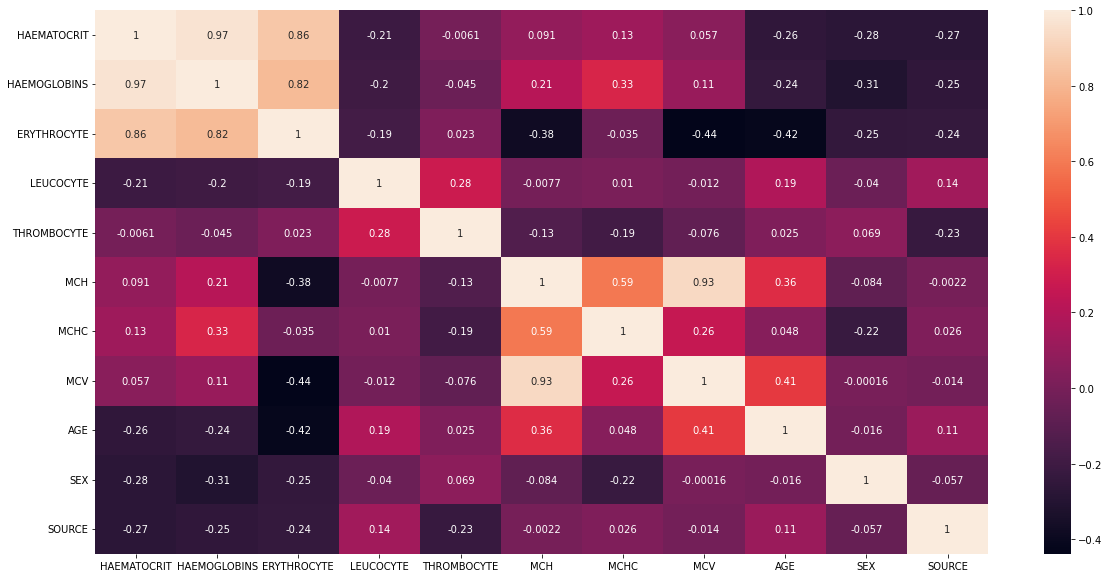

In [91]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

##### Running Your First Training Model

In [93]:
import statsmodels.api as sm

In [94]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 SOURCE   No. Observations:                 2316
Model:                            GLM   Df Residuals:                     2311
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1431.9
Date:                Thu, 15 Feb 2024   Deviance:                       2863.9
Time:                        17:28:08   Pearson chi2:                 2.58e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0527      0.152      0.346      0.729      -0.246       0.351
LEUCOCYTE       5.3101      0.598      8.879      0.000       4.138       6.482
THROMBOCYTE    -5.8588      0.467    -12.557      0.000      -6.773      -4.944
AGE             0.5998      0.191      3.138      0.002       0.225       0.974
SEX            -0.0912      0.090     -1.012      0.312      -0.268       0.085
===============================================================================
"""